# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count = mouse_study_complete[["Mouse ID"]].nunique()
print(count)

Mouse ID    249
dtype: int64


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplic1 = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"])]
print(duplic1['Mouse ID'].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get list Of duplicate rows using multiple columns

duplic2 = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989"]
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplic2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete2 = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] != "g989"]
mouse_study_complete2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
count = mouse_study_complete2[["Mouse ID"]].nunique()
print(count)

Mouse ID    248
dtype: int64


In [7]:
# checking types
mouse_study_complete2.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Create reuced dataframe with just drug regimen and tumor volume
mouse_study_stats = mouse_study_complete2.loc[:,["Drug Regimen","Tumor Volume (mm3)"]] 
mouse_study_stats = mouse_study_stats.set_index(list(mouse_study_stats)[0])

#stats
mean = mouse_study_stats.groupby(["Drug Regimen"]).mean()
mean= mean.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

median = mouse_study_stats.groupby(["Drug Regimen"]).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

variance = mouse_study_stats.groupby(["Drug Regimen"]).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})

stdev = mouse_study_stats.groupby(["Drug Regimen"]).var()
stdev = stdev.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})

SEM = mouse_study_stats.groupby(["Drug Regimen"]).sem()
SEM = SEM.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

# Merging mini-dataframes
mouse_study_stats_sum = pd.merge(mean, median, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, variance, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, stdev, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, SEM, how = "left", on = ["Drug Regimen"])

mouse_study_stats_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [9]:
mouse_study_stats

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,45.000000
Ketapril,45.000000
Ketapril,45.000000
Ketapril,45.000000
Ketapril,45.000000
...,...
Capomulin,41.581521
Capomulin,31.023923
Ceftamin,61.433892


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#messed around with this a bit but so far no go 5/30

## Bar and Pie Charts

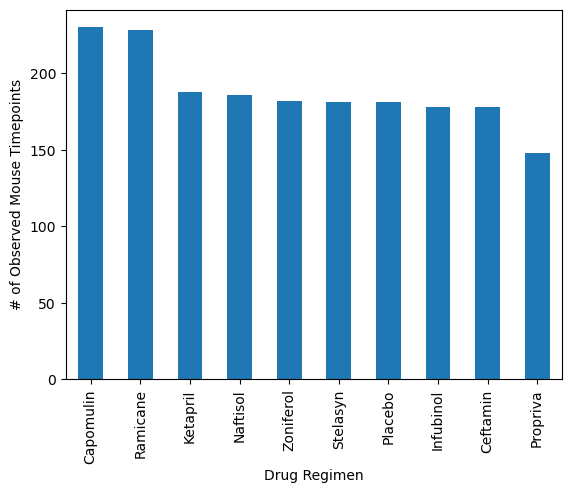

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# count the number of rows for each drug regimen and put into a dataframe
drug_timept = pd.DataFrame(mouse_study_complete2["Drug Regimen"].value_counts())
drug_timept.rename(columns={"Drug Regimen": "# of Timepoints"}, inplace = True)
drug_timept.index.name = "Drug Regimen"

# Use DataFrame.plot() in order to create a bar chart of the data
drug_timept.plot(kind="bar", width= 0.5, legend=False)
plt.ylabel("# of Observed Mouse Timepoints")
#check THIS

plt.show()

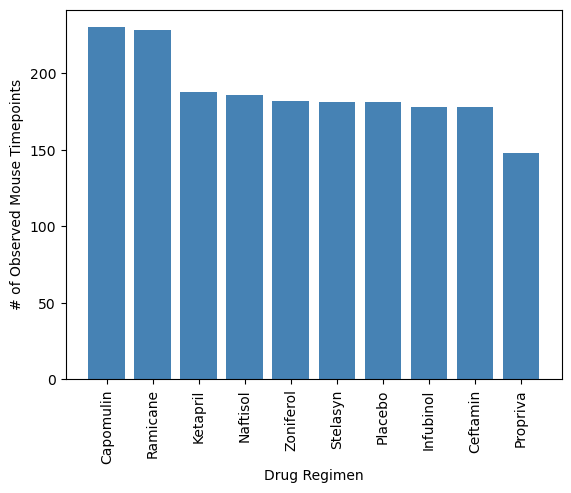

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen and put into a dataframe
drug_timept2 = pd.DataFrame(mouse_study_complete2["Drug Regimen"].value_counts())
drug_timept2.rename(columns={"Drug Regimen": "# of Timepoints"}, inplace = True)
drug_timept2.index.name = "Drug Regimen"
# drug_timept2

# Set x axis and tick locations
x_axis = np.arange(len(drug_timept2.index))
tick_locations = [value for value in x_axis]

# Create plot
plt.bar(x_axis, drug_timept2["# of Timepoints"], color='steelblue', alpha=1, align="center")
plt.xticks(tick_locations, drug_timept2.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


array([<Axes: ylabel='Sex'>], dtype=object)

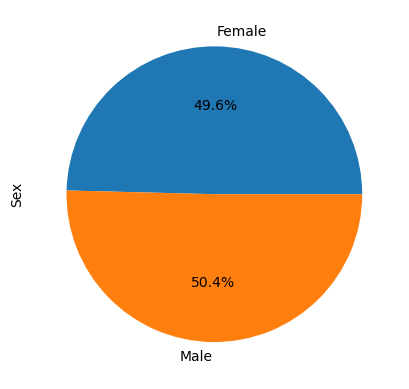

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter the DataFrame down only to those columns to chart and rename columns
sex_df = mouse_study_complete2[["Mouse ID","Sex"]]

# Remove redundant Mouse ID
sex_df = sex_df.drop_duplicates(subset=["Mouse ID"])

# Count the number of males vs. females
sex_df2 = sex_df.groupby("Sex").count()

# Renaming headers in df
sex_df2.index.name = None
sex_df2.rename(columns={"Mouse ID": "Sex"}, inplace = True)

# Create plot
sex_df2.plot(kind='pie', subplots=True, autopct='%1.1f%%', legend = False)

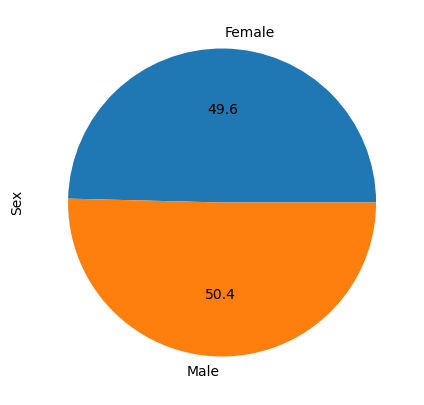

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

def my_autopct(pct):
    return ('%.1f' % pct)

plot = sex_df2.plot.pie(y='Sex', autopct=my_autopct, figsize=(5, 5))
plot.get_legend().remove()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
f_tumor_volgr =  mouse_study_complete2.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
f_tumor_volgr = pd.DataFrame(f_tumor_volgr)
# f_tumor_volgr

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
f_tumor_mrg = pd.merge(f_tumor_volgr, mouse_study_complete2, how="left", on=["Timepoint", "Timepoint"])
f_tumor_mrg = pd.merge(f_tumor_volgr, mouse_study_complete2, on=["Mouse ID", "Timepoint"]).loc[:,["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]] 
f_tumor_mrg

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [16]:
# decrease the df to just the drugs of interest: treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
  
# Selecting rows based on condition
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
red_treatments = f_tumor_mrg[f_tumor_mrg["Drug Regimen"].isin(treatments)]
red_treatments

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
194,Ramicane,s508,45,30.276232
195,Ramicane,u196,45,40.667713
196,Ramicane,w678,5,43.166373
197,Ramicane,y449,15,44.183451


In [17]:
# Resetting Index and removing extra columns
red_treatind = red_treatments.set_index("Drug Regimen")
red_treatind = red_treatind.drop(columns=['Mouse ID', 'Timepoint'])

red_treatind

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,38.982878
Capomulin,38.939633
Capomulin,30.485985
Capomulin,37.074024
Capomulin,40.159220
...,...
Ramicane,30.276232
Ramicane,40.667713
Ramicane,43.166373


In [55]:
# Determine outliers using upper and lower bounds

outliers = []

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for t in range(len(treatments)):
    treatment = treatments[t]

    tempdf = red_treatind.loc[treatment]
    tempdfsrt = tempdf.sort_values(by=['Tumor Volume (mm3)'])
#     print(tempdfsrt)
    
    quartiles = tempdfsrt['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    for s in range(len(tempdfsrt['Tumor Volume (mm3)'])):
#         df.index < 6) & (df.A == 0), 'C'] = 
        if [(tempdfsrt.index == treatment) & (tempdfsrt['Tumor Volume (mm3)'] < lower_bound) | (tempdfsrt['Tumor Volume (mm3)'] > upper_bound)]:
            outliers.append(tempdfsrt["Tumor Volume (mm3)"])
        else:
            pass

print (outliers)
#     print(lower_bound)
#     print(upper_bound)
#     20.70456164999999
#     51.83201549
#     17.912664470000003
#     54.30681135
#     36.83290494999999
#     82.74144559000001
#     25.355449580000002
#     87.66645829999999


[Drug Regimen
Capomulin    23.343598
Capomulin    28.430964
Capomulin    28.484033
Capomulin    30.485985
Capomulin    31.023923
Capomulin    31.896238
Capomulin    32.377357
Capomulin    33.329098
Capomulin    34.455298
Capomulin    36.041047
Capomulin    37.074024
Capomulin    37.311846
Capomulin    38.125164
Capomulin    38.753265
Capomulin    38.846876
Capomulin    38.939633
Capomulin    38.982878
Capomulin    39.952347
Capomulin    40.159220
Capomulin    40.658124
Capomulin    40.728578
Capomulin    41.483008
Capomulin    41.581521
Capomulin    46.539206
Capomulin    47.685963
Name: Tumor Volume (mm3), dtype: float64, Drug Regimen
Capomulin    23.343598
Capomulin    28.430964
Capomulin    28.484033
Capomulin    30.485985
Capomulin    31.023923
Capomulin    31.896238
Capomulin    32.377357
Capomulin    33.329098
Capomulin    34.455298
Capomulin    36.041047
Capomulin    37.074024
Capomulin    37.311846
Capomulin    38.125164
Capomulin    38.753265
Capomulin    38.846876
Capomulin  

In [46]:
# # Determine outliers using upper and lower bounds

# outliers = []

# treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# for t in range(len(treatments)):
#     treatment = treatments[t]

#     tempdf = red_treatind.loc[treatment]
#     tempdfsrt = tempdf.sort_values(by=['Tumor Volume (mm3)'])
# #     print(tempdfsrt)
    
#     quartiles = tempdfsrt['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
    
#     for s in range(len(tempdfsrt['Tumor Volume (mm3)'])):
#         if [(tempdfsrt['Tumor Volume (mm3)'] < lower_bound) | (tempdfsrt['Tumor Volume (mm3)'] > lower_bound)]:
#             outliers.append(red_treatind["Tumor Volume (mm3)"])

# print (outliers)
# #     print(lower_bound)
# #     print(upper_bound)
# #     20.70456164999999
# #     51.83201549
# #     17.912664470000003
# #     54.30681135
# #     36.83290494999999
# #     82.74144559000001
# #     25.355449580000002
# #     87.66645829999999

# # tvol = []



# #     times.sort()
    
# # print(tempdf)

# # ok so by outdenting print here I've isolated the tumor volume so from this I should be able to sort by 
# # tumor volume and id outliers


# # quartiles = temperatures.quantile([.25,.5,.75])
# # lowerq = quartiles[0.25]
# # upperq = quartiles[0.75]
# # iqr = upperq-lowerq

# # print(f"The lower quartile of temperatures is: {lowerq}")
# # print(f"The upper quartile of temperatures is: {upperq}")
# # print(f"The interquartile range of temperatures is: {iqr}")
# # print(f"The the median of temperatures is: {quartiles[0.5]} ")

# # lower_bound = lowerq - (1.5*iqr)
# # upper_bound = upperq + (1.5*iqr)
# # print(f"Values below {lower_bound} could be outliers.")
# # print(f"Values above {upper_bound} could be outliers.")

KeyError: ('Capomulin', 'Tumor Volume (mm3)')

In [ ]:
# # Subset for each drug
# treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# tvol = []

# # df.loc['viper']
# for t in range(len(treatments)):
# treatment = treatments[t]
# df.loc['viper']





In [ ]:
# # Subset for each drug
# treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# tvol = []

# for t in range(len(treatments)):
#     treatment = treatments[t]
#     print(treatment)

# #     print(treatment)

#     for m in range(len(red_treatments)):
#         drug = red_treatments.iloc[m,0]
# #     print(drug)
        
#         if drug == treatment:
#             tvol.append(red_treatments["Tumor Volume (mm3)"])
#             print(tvol)
            
#         else:
#             t = (t+1)
#             tvol=[]
            




In [ ]:
# Make lists by grouping the drugs
# df2 = df.groupby('Courses')['Fee'].apply(list)
gr_treat = red_treatments.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
print(gr_treat)


In [ ]:
# convert the list above to a dataframe
# gr_treat_df = pd.DataFrame(gr_treat)
# gr_treat_df

grouped_df = gr_treat.to_frame()
grouped_df = grouped_df.transpose()
print(grouped_df)
print(type(grouped_df))

In [ ]:
# Determine outliers using upper and lower bounds




In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# mice = f_tumor_mrg["Mouse ID"]

# Create empty list to fill with tumor vol data (for plotting)
tvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
# Locate the rows which contain mice on each drug and get the tumor volumes
# mylist = [1,2,3,4,5]
# for i in mylist:
#      new_df = df[df['col_1'] == i]
#      # do stuff with your new dataframe

# for t in treatments:
# temp_treat = f_tumor_mrg[f_tumor_mrg["Drug Regimen"]] == 

# for i in range(len(iris)):
#     Class = iris.iloc[i,4]
#     if Class == 'versicolor' and i < 70:
#         print (Class)


treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tvol = []

for treatment in treatments
    for m in range(len(f_tumor_mrg)):
        drug = f_tumor_mrg.iloc[m,1]
        if drug == treatment:
            


# for treatment in treatments:

# for treatment in treatments:
#     for x in mice:
#         for [treatment] in f_tumor_mrg["Drug Regimen"]:
#             tvol.append(f_tumor_mrg["Tumor Volume (mm3)"])
#     print(tvol)  


    # add subset 
#     HERE!!
    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
